In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

sns.set()
sns.set_style("whitegrid")


In [25]:
import matplotlib.colors as colors


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


cmap_64 = plt.get_cmap("Blues")
cmap_64 = truncate_colormap(cmap_64, 0.3, 0.9)
cmap_32 = plt.get_cmap("Oranges")
cmap_32 = truncate_colormap(cmap_32, 0.3, 0.9)
cmap_16 = plt.get_cmap("Greens")
cmap_16 = truncate_colormap(cmap_16, 0.3, 0.9)


In [26]:
cu_data = pd.read_csv("../data/spmv-cusparse-1201-4090-70-dis.csv",
                      header=None,
                      names=[
                          "cu_pro", "mat", "x", "y", "compute", "m", "n",
                          "nnz", "cu_time", "cu_gflops"
                      ])
# work_est = pd.read_csv("level_info.csv",
#                        header=None,
#                        names=[
#                            "mat", "nlevel", "parallelism_min",
#                            "parallelism_avg", "parallelism_max"
#                        ])
cu_data = cu_data.loc[:, ["cu_pro", "mat", "nnz", "cu_time", "cu_gflops"]]

# cu_data = pd.merge(cu_data, work_est, how='inner', on='mat')
# print(cu_data)

cu_info = cu_data["cu_pro"].unique()

print(cu_data)

for diff_pro in cu_info:
    temp_data = cu_data[cu_data["cu_pro"].isin([diff_pro])]
    exec("%s=temp_data.copy()" % diff_pro)
# print(cu_info)

                             cu_pro  \
0      exe_spmv_cusparse_16BF_32_32   
1             exe_spmv_cusparse_32F   
2             exe_spmv_cusparse_64F   
3         exe_spmv_cusparse_8_32_32   
4      exe_spmv_cusparse_16BF_32_32   
...                             ...   
11523     exe_spmv_cusparse_8_32_32   
11524  exe_spmv_cusparse_16BF_32_32   
11525         exe_spmv_cusparse_32F   
11526         exe_spmv_cusparse_64F   
11527     exe_spmv_cusparse_8_32_32   

                                                 mat       nnz  cu_time  \
0       /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00765   
1       /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00775   
2       /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00930   
3       /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00725   
4          /ssget/MM/Freescale/FullChip/FullChip.cbd  26621990  0.18720   
...                                              ...       ...      ...   
11523 

In [27]:
print(exe_spmv_cusparse_32F)

                      cu_pro  \
1      exe_spmv_cusparse_32F   
5      exe_spmv_cusparse_32F   
9      exe_spmv_cusparse_32F   
13     exe_spmv_cusparse_32F   
17     exe_spmv_cusparse_32F   
...                      ...   
11509  exe_spmv_cusparse_32F   
11513  exe_spmv_cusparse_32F   
11517  exe_spmv_cusparse_32F   
11521  exe_spmv_cusparse_32F   
11525  exe_spmv_cusparse_32F   

                                                     mat       nnz  cu_time  \
1           /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00775   
5              /ssget/MM/Freescale/FullChip/FullChip.cbd  26621990  0.24365   
9          /ssget/MM/Freescale/Freescale1/Freescale1.cbd  18920347  0.17705   
13     /ssget/MM/Freescale/circuit5M_dc/circuit5M_dc.cbd  19194193  0.17980   
17           /ssget/MM/Freescale/transient/transient.cbd    961790  0.01015   
...                                                  ...       ...      ...   
11509      /ssget/MM/Bodendiek/CurlCurl_4/CurlCurl_4.cbd  2651

In [28]:
# Collect the 16-bit data

regex_mat = '(?<=exe_spmv_cusparse_16BF_32_32,).[a-zA-Z0-9\.\/\-_]*'
regex_L1 = '(?<="L1/TEX Cache Throughput","%",").[.0-9_]*'
regex_L2 = '(?<="L2 Cache Throughput","%",").[.0-9_]*'
regex_mpb = '(?<="Mem Pipes Busy","%",").[.0-9_]*'
regex_mb = '(?<="Mem Busy","%",").[.0-9_]*'
regex_sb = '(?<="SM Busy","%",").[.0-9_]*'

spmv_mat_16 = []
spmv_L1_16 = []
spmv_L2_16 = []
spmv_mpb_16 = []
spmv_mb_16 = []
spmv_sb_16 = []

fileHandler = open("../data/ncu-spmv-cusparse12-4090-detail.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break
    if not line.startswith("exe_spmv_cusparse_16BF_32_32"):
        continue

    str_select = re.findall(regex_mat, line)
    spmv_mat_16.append(str_select)

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L1_16.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L2_16.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mpb_16.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mb_16.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_sb_16.append(np.mean(num_list_new))

fileHandler.close()

df_spmv_mat_16 = pd.DataFrame(spmv_mat_16, columns=['mat'])
df_spmv_L1_16 = pd.DataFrame(spmv_L1_16, columns=['L1_rate'])
df_spmv_L2_16 = pd.DataFrame(spmv_L2_16, columns=['L2_rate'])
df_spmv_mpb_16 = pd.DataFrame(spmv_mpb_16, columns=['mem_pipe_busy'])
df_spmv_mb_16 = pd.DataFrame(spmv_mb_16, columns=['mem_busy'])
df_spmv_sb_16 = pd.DataFrame(spmv_sb_16, columns=['sm_busy'])

df_spmv_ncu_16 = pd.concat([
    df_spmv_mat_16, df_spmv_L1_16, df_spmv_L2_16, df_spmv_mpb_16,
    df_spmv_mb_16, df_spmv_sb_16
],
                             axis=1)

df_all_16 = pd.merge(exe_spmv_cusparse_16BF_32_32,
                     df_spmv_ncu_16,
                     on="mat",
                     how="inner")

print(df_all_16)


/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                            cu_pro  \
0     exe_spmv_cusparse_16BF_32_32   
1     exe_spmv_cusparse_16BF_32_32   
2     exe_spmv_cusparse_16BF_32_32   
3     exe_spmv_cusparse_16BF_32_32   
4     exe_spmv_cusparse_16BF_32_32   
...                            ...   
2877  exe_spmv_cusparse_16BF_32_32   
2878  exe_spmv_cusparse_16BF_32_32   
2879  exe_spmv_cusparse_16BF_32_32   
2880  exe_spmv_cusparse_16BF_32_32   
2881  exe_spmv_cusparse_16BF_32_32   

                                                    mat       nnz  cu_time  \
0          /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00765   
1             /ssget/MM/Freescale/FullChip/FullChip.cbd  26621990  0.18720   
2         /ssget/MM/Freescale/Freescale1/Freescale1.cbd  18920347  0.13790   
3     /ssget/MM/Freescale/circuit5M_dc/circuit5M_dc.cbd  19194193  0.13970   
4           /ssget/MM/Freescale/transient/transient.cbd    961790  0.00950   
...                                                 ...       ...      ... 

In [29]:
# Collect the 32-bit data

regex_mat = '(?<=exe_spmv_cusparse_32F,).[a-zA-Z0-9\.\/\-_]*'
regex_L1 = '(?<="L1/TEX Cache Throughput","%",").[.0-9_]*'
regex_L2 = '(?<="L2 Cache Throughput","%",").[.0-9_]*'
regex_mpb = '(?<="Mem Pipes Busy","%",").[.0-9_]*'
regex_mb = '(?<="Mem Busy","%",").[.0-9_]*'
regex_sb = '(?<="SM Busy","%",").[.0-9_]*'

spmv_mat_32 = []
spmv_L1_32 = []
spmv_L2_32 = []
spmv_mpb_32 = []
spmv_mb_32 = []
spmv_sb_32 = []

fileHandler = open("../data/ncu-spmv-cusparse12-4090-detail.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break
    if not line.startswith("exe_spmv_cusparse_32F"):
        continue

    str_select = re.findall(regex_mat, line)
    spmv_mat_32.append(str_select)

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L1_32.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L2_32.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mpb_32.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mb_32.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_sb_32.append(np.mean(num_list_new))

fileHandler.close()

df_spmv_mat_32 = pd.DataFrame(spmv_mat_32, columns=['mat'])
df_spmv_L1_32 = pd.DataFrame(spmv_L1_32, columns=['L1_rate'])
df_spmv_L2_32 = pd.DataFrame(spmv_L2_32, columns=['L2_rate'])
df_spmv_mpb_32 = pd.DataFrame(spmv_mpb_32, columns=['mem_pipe_busy'])
df_spmv_mb_32 = pd.DataFrame(spmv_mb_32, columns=['mem_busy'])
df_spmv_sb_32 = pd.DataFrame(spmv_sb_32, columns=['sm_busy'])

df_spmv_ncu_32 = pd.concat([
    df_spmv_mat_32, df_spmv_L1_32, df_spmv_L2_32, df_spmv_mpb_32,
    df_spmv_mb_32, df_spmv_sb_32
],
                             axis=1)

df_all_32 = pd.merge(exe_spmv_cusparse_32F,
                     df_spmv_ncu_32,
                     on="mat",
                     how="inner")

print(df_all_32)


/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                     cu_pro  \
0     exe_spmv_cusparse_32F   
1     exe_spmv_cusparse_32F   
2     exe_spmv_cusparse_32F   
3     exe_spmv_cusparse_32F   
4     exe_spmv_cusparse_32F   
...                     ...   
2877  exe_spmv_cusparse_32F   
2878  exe_spmv_cusparse_32F   
2879  exe_spmv_cusparse_32F   
2880  exe_spmv_cusparse_32F   
2881  exe_spmv_cusparse_32F   

                                                    mat       nnz  cu_time  \
0          /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00775   
1             /ssget/MM/Freescale/FullChip/FullChip.cbd  26621990  0.24365   
2         /ssget/MM/Freescale/Freescale1/Freescale1.cbd  18920347  0.17705   
3     /ssget/MM/Freescale/circuit5M_dc/circuit5M_dc.cbd  19194193  0.17980   
4           /ssget/MM/Freescale/transient/transient.cbd    961790  0.01015   
...                                                 ...       ...      ...   
2877      /ssget/MM/Bodendiek/CurlCurl_4/CurlCurl_4.cbd  26515867  0.23660   
287

In [30]:
# Collect the 64-bit data

regex_mat = '(?<=exe_spmv_cusparse_64F,).[a-zA-Z0-9\.\/\-_]*'
regex_L1 = '(?<="L1/TEX Cache Throughput","%",").[.0-9_]*'
regex_L2 = '(?<="L2 Cache Throughput","%",").[.0-9_]*'
regex_mpb = '(?<="Mem Pipes Busy","%",").[.0-9_]*'
regex_mb = '(?<="Mem Busy","%",").[.0-9_]*'
regex_sb = '(?<="SM Busy","%",").[.0-9_]*'

spmv_mat_64 = []
spmv_L1_64 = []
spmv_L2_64 = []
spmv_mpb_64 = []
spmv_mb_64 = []
spmv_sb_64 = []

fileHandler = open("../data/ncu-spmv-cusparse12-4090-detail.csv", "r")

while True:
    line = fileHandler.readline()
    if not line:
        break
    if not line.startswith("exe_spmv_cusparse_64F"):
        continue

    str_select = re.findall(regex_mat, line)
    spmv_mat_64.append(str_select)

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L1_64.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    spmv_L2_64.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mpb_64.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_mb_64.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    spmv_sb_64.append(np.mean(num_list_new))

fileHandler.close()

df_spmv_mat_64 = pd.DataFrame(spmv_mat_64, columns=['mat'])
df_spmv_L1_64 = pd.DataFrame(spmv_L1_64, columns=['L1_rate'])
df_spmv_L2_64 = pd.DataFrame(spmv_L2_64, columns=['L2_rate'])
df_spmv_mpb_64 = pd.DataFrame(spmv_mpb_64, columns=['mem_pipe_busy'])
df_spmv_mb_64 = pd.DataFrame(spmv_mb_64, columns=['mem_busy'])
df_spmv_sb_64 = pd.DataFrame(spmv_sb_64, columns=['sm_busy'])

df_spmv_ncu_64 = pd.concat([
    df_spmv_mat_64, df_spmv_L1_64, df_spmv_L2_64, df_spmv_mpb_64,
    df_spmv_mb_64, df_spmv_sb_64
],
                             axis=1)

df_all_64 = pd.merge(exe_spmv_cusparse_64F,
                     df_spmv_ncu_64,
                     on="mat",
                     how="inner")

print(df_all_64)


/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                     cu_pro  \
0     exe_spmv_cusparse_64F   
1     exe_spmv_cusparse_64F   
2     exe_spmv_cusparse_64F   
3     exe_spmv_cusparse_64F   
4     exe_spmv_cusparse_64F   
...                     ...   
2877  exe_spmv_cusparse_64F   
2878  exe_spmv_cusparse_64F   
2879  exe_spmv_cusparse_64F   
2880  exe_spmv_cusparse_64F   
2881  exe_spmv_cusparse_64F   

                                                    mat       nnz  cu_time  \
0          /ssget/MM/Szczerba/Ill_Stokes/Ill_Stokes.cbd    191368  0.00930   
1             /ssget/MM/Freescale/FullChip/FullChip.cbd  26621990  0.37490   
2         /ssget/MM/Freescale/Freescale1/Freescale1.cbd  18920347  0.28680   
3     /ssget/MM/Freescale/circuit5M_dc/circuit5M_dc.cbd  19194193  0.29975   
4           /ssget/MM/Freescale/transient/transient.cbd    961790  0.01640   
...                                                 ...       ...      ...   
2877      /ssget/MM/Bodendiek/CurlCurl_4/CurlCurl_4.cbd  26515867  0.35345   
287

In [31]:
cu_data_comp = pd.merge(df_all_64,
                        df_all_32,
                        how='inner',
                        on='mat',
                        suffixes=("_64", ""))
cu_data_comp = pd.merge(
                        cu_data_comp,
                        df_all_16,
                        how='inner',
                        on='mat',
                        suffixes=("_32", "_16"))
# print(cu_data_comp)
cu_data_comp = cu_data_comp.loc[:, [
    "mat", "cu_gflops_64", "cu_gflops_32", "cu_gflops_16", "nnz_64",
    "L1_rate_64" , "L2_rate_64" , "mem_pipe_busy_64" , "mem_busy_64" , "sm_busy_64" ,
    "L1_rate_32" , "L2_rate_32" , "mem_pipe_busy_32" , "mem_busy_32" , "sm_busy_32" ,
    "L1_rate_16" , "L2_rate_16" , "mem_pipe_busy_16" , "mem_busy_16" , "sm_busy_16" ,
]]

cu_data_comp["cu_gflops_diff_32"] = cu_data_comp["cu_gflops_32"] / cu_data_comp["cu_gflops_64"]
cu_data_comp["cu_gflops_diff_16"] = cu_data_comp["cu_gflops_16"] / cu_data_comp["cu_gflops_64"]

cu_data_comp["L1_rate_diff_32"] = cu_data_comp["L1_rate_32"] / cu_data_comp["L1_rate_64"]
cu_data_comp["L1_rate_diff_16"] = cu_data_comp["L1_rate_16"] / cu_data_comp["L1_rate_64"]

cu_data_comp["L2_rate_diff_32"] = cu_data_comp["L2_rate_32"] / cu_data_comp["L2_rate_64"]
cu_data_comp["L2_rate_diff_16"] = cu_data_comp["L2_rate_16"] / cu_data_comp["L2_rate_64"]

cu_data_comp["mem_pipe_busy_diff_32"] = cu_data_comp["mem_pipe_busy_32"] / cu_data_comp["mem_pipe_busy_64"]
cu_data_comp["mem_pipe_busy_diff_16"] = cu_data_comp["mem_pipe_busy_16"] / cu_data_comp["mem_pipe_busy_64"]

cu_data_comp["mem_busy_diff_32"] = cu_data_comp["mem_busy_32"] / cu_data_comp["mem_busy_64"]
cu_data_comp["mem_busy_diff_16"] = cu_data_comp["mem_busy_16"] / cu_data_comp["mem_busy_64"]

cu_data_comp["sm_busy_diff_32"] = cu_data_comp["sm_busy_32"] / cu_data_comp["sm_busy_64"]
cu_data_comp["sm_busy_diff_16"] = cu_data_comp["sm_busy_16"] / cu_data_comp["sm_busy_64"]


cu_data_comp=cu_data_comp.loc[(cu_data_comp["nnz_64"] > 2**20)].copy()
print(cu_data_comp)


                                                    mat  cu_gflops_64  \
1             /ssget/MM/Freescale/FullChip/FullChip.cbd       142.022   
2         /ssget/MM/Freescale/Freescale1/Freescale1.cbd       131.941   
3     /ssget/MM/Freescale/circuit5M_dc/circuit5M_dc.cbd       128.068   
5         /ssget/MM/Freescale/Freescale2/Freescale2.cbd       141.714   
6               /ssget/MM/Freescale/memchip/memchip.cbd       139.456   
...                                                 ...           ...   
2876      /ssget/MM/Bodendiek/CurlCurl_3/CurlCurl_3.cbd       144.824   
2877      /ssget/MM/Bodendiek/CurlCurl_4/CurlCurl_4.cbd       150.040   
2878      /ssget/MM/Bodendiek/CurlCurl_1/CurlCurl_1.cbd       182.105   
2880      /ssget/MM/Bodendiek/CurlCurl_2/CurlCurl_2.cbd       139.785   
2881            /ssget/MM/Pereyra/landmark/landmark.cbd       149.998   

      cu_gflops_32  cu_gflops_16    nnz_64  L1_rate_64  L2_rate_64  \
1          218.526       284.423  26621990       22.3

In [32]:
#读取cmp单个点的颜色的RGB值

from matplotlib import cm

def get_pcv(cn,r):
    #cn是cmap实例，例如 cn = cm.viridis, cm=cm.jet
    #r是行号，整数，如12
   
    print(cn(r)[0],cn(r)[1],cn(r)[2])
    #转换为256色表示的整数
    print(int(cn(r)[0]*255.0),int(cn(r)[1]*255.0),int(cn(r)[2]*255.0)) 

# print(get_pcv(cmap_16,0))
print(cmap_16(0))

(0.723121876201461, 0.8896116878123799, 0.6971780084582853, 1.0)


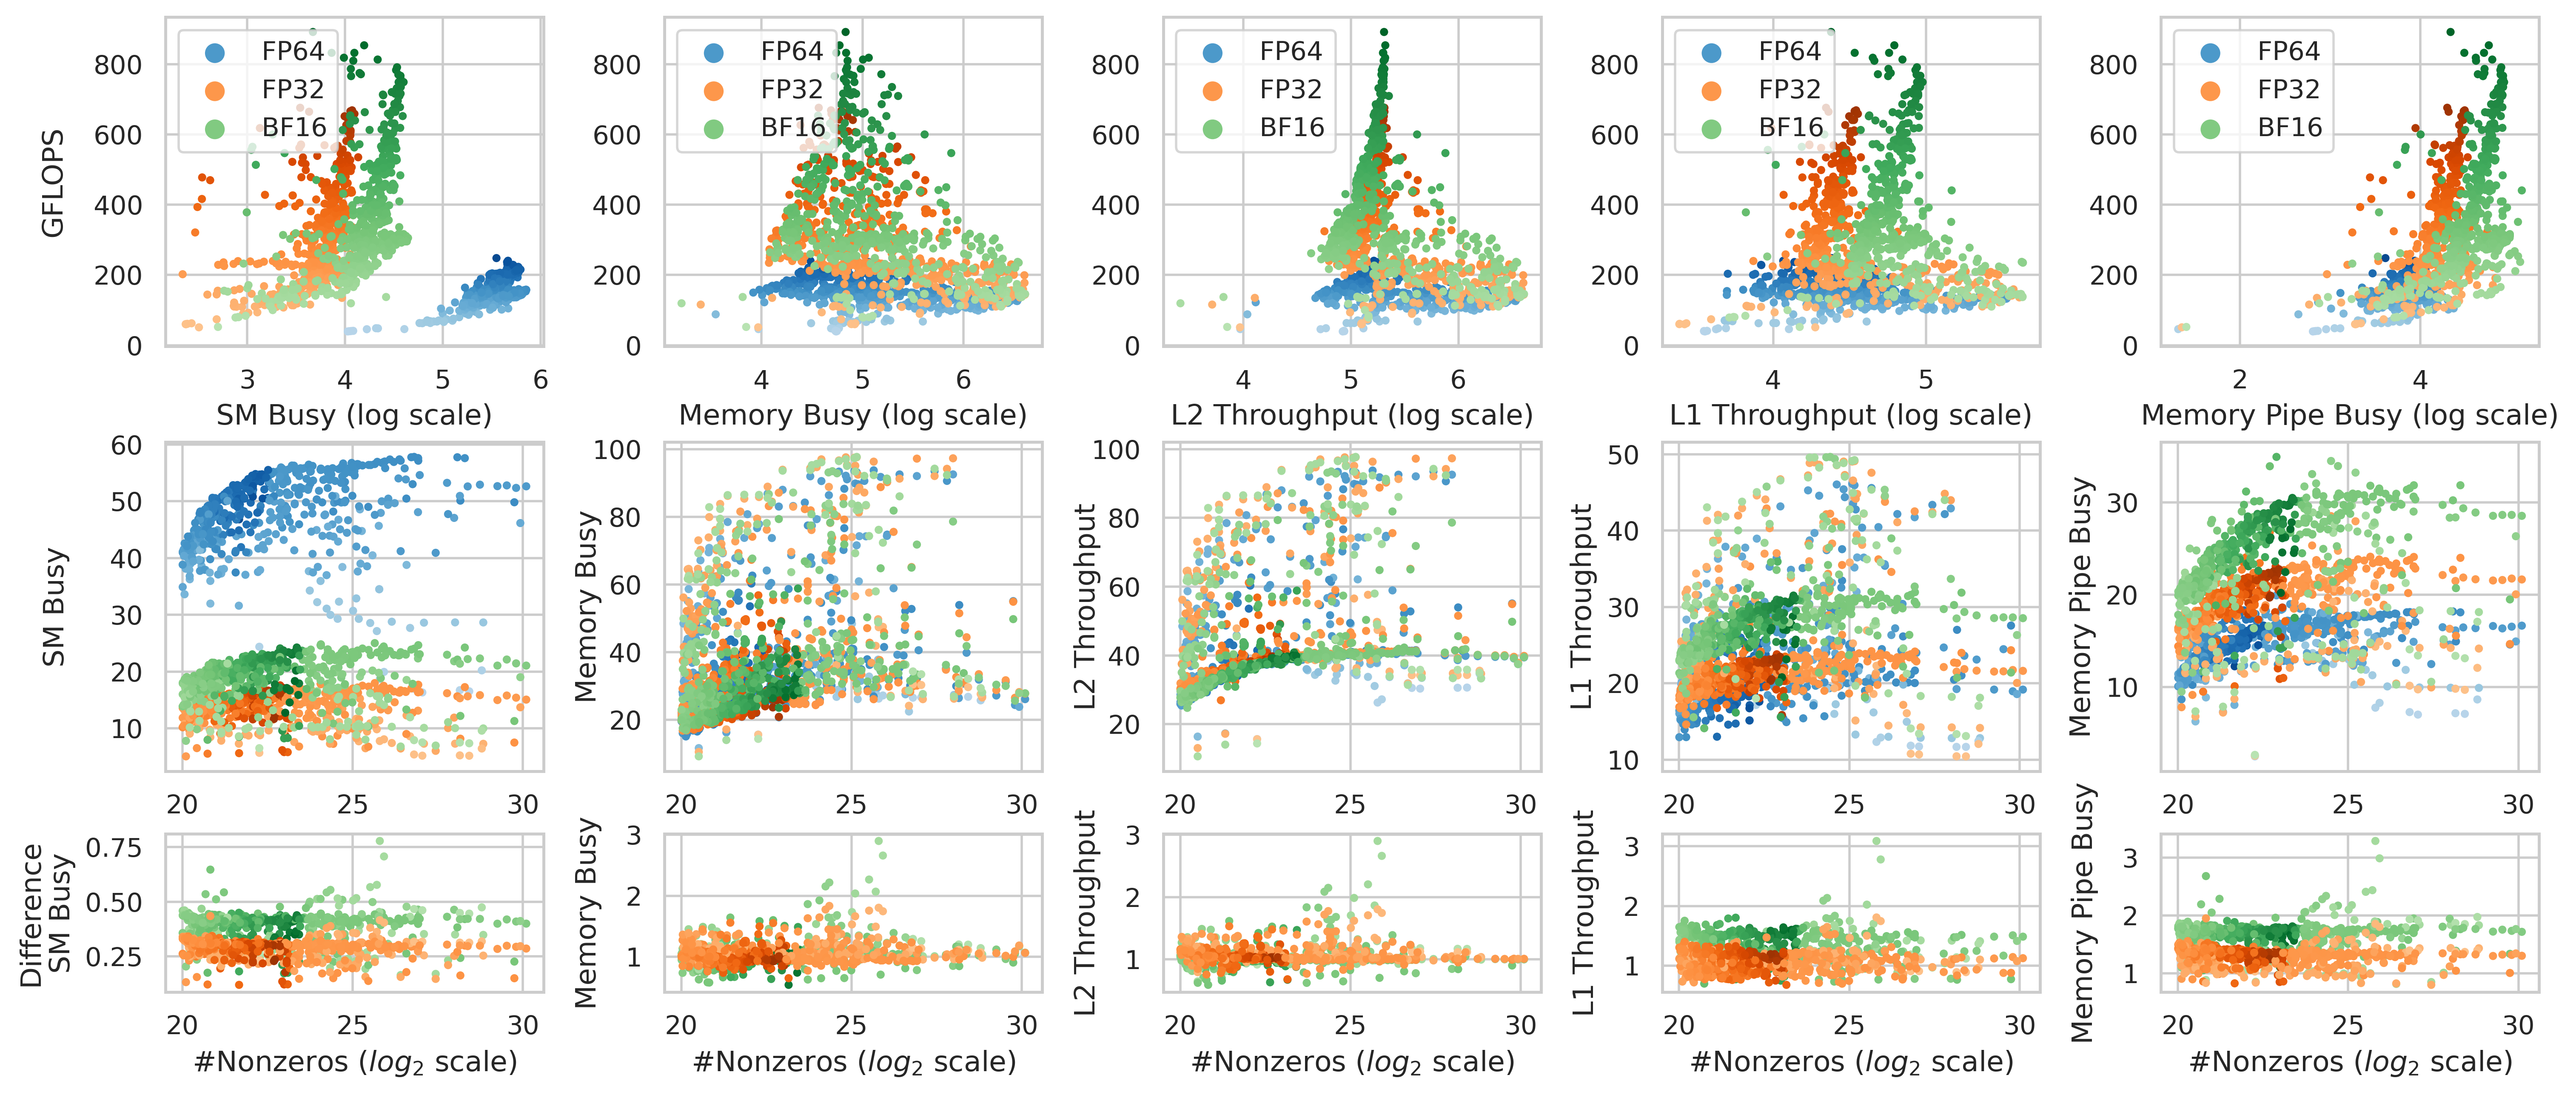

In [33]:
%matplotlib inline

# fig, axs = plt.subplots(3, 5, figsize=(18, 12), dpi=400)
plt.figure(figsize=(18, 9), dpi=400)

# fig.subplots_adjust(right=None, left=None,wspace=0.3, hspace=0.2)
plt.subplots_adjust(right=None, left=None,wspace=0.32, hspace=0.29)
# fig.subplots_adjust(hspace=)

mark_size= 6

plt.subplot(3,5,1)

plt.scatter(
    np.log2(cu_data_comp["sm_busy_64"]),
    (cu_data_comp["cu_gflops_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["sm_busy_32"]),
    (cu_data_comp["cu_gflops_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["sm_busy_16"]),
    (cu_data_comp["cu_gflops_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.legend(loc=2, markerscale=3)
plt.xlabel("SM Busy (log scale)")
plt.ylabel("GFLOPS",labelpad=11)


plt.subplot(3,5,2)

plt.scatter(
    np.log2(cu_data_comp["mem_busy_64"]),
    (cu_data_comp["cu_gflops_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["mem_busy_32"]),
    (cu_data_comp["cu_gflops_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["mem_busy_16"]),
    (cu_data_comp["cu_gflops_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.legend(loc=2, markerscale=3)
plt.xlabel("Memory Busy (log scale)")
# plt.ylabel("GFlops")


plt.subplot(3,5,3)

plt.scatter(
    np.log2(cu_data_comp["L2_rate_64"]),
    (cu_data_comp["cu_gflops_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["L2_rate_32"]),
    (cu_data_comp["cu_gflops_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["L2_rate_16"]),
    (cu_data_comp["cu_gflops_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.legend(loc=2, markerscale=3)
plt.xlabel("L2 Throughput (log scale)")
# plt.ylabel("GFlops")


plt.subplot(3,5,4)

plt.scatter(
    np.log2(cu_data_comp["L1_rate_64"]),
    (cu_data_comp["cu_gflops_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["L1_rate_32"]),
    (cu_data_comp["cu_gflops_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["L1_rate_16"]),
    (cu_data_comp["cu_gflops_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.legend(loc=2, markerscale=3)
plt.xlabel("L1 Throughput (log scale)")
# plt.ylabel("GFlops")

plt.subplot(3,5,5)

plt.scatter(
    np.log2(cu_data_comp["mem_pipe_busy_64"]),
    (cu_data_comp["cu_gflops_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["mem_pipe_busy_32"]),
    (cu_data_comp["cu_gflops_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["mem_pipe_busy_16"]),
    (cu_data_comp["cu_gflops_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.legend(loc=2, markerscale=3)
plt.xlabel("Memory Pipe Busy (log scale)")
# plt.ylabel("GFlops")


plt.subplot(3,5,6)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["sm_busy_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["sm_busy_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["sm_busy_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

# plt.legend()
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("SM Busy",labelpad=17)


plt.subplot(3,5,7)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_busy_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_busy_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_busy_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

# plt.legend()
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("Memory Busy",labelpad=-4)


plt.subplot(3,5,8)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L2_rate_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L2_rate_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L2_rate_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

# plt.legend()
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("L2 Throughput",labelpad=-4)


plt.subplot(3,5,9)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L1_rate_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L1_rate_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L1_rate_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

# plt.legend()
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("L1 Throughput")

plt.subplot(3,5,10)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_pipe_busy_64"]),
    label="FP64",
    c=(cu_data_comp["cu_gflops_64"]),
    cmap=cmap_64,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_pipe_busy_32"]),
    label="FP32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_pipe_busy_16"]),
    label="BF16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

# plt.legend()
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("Memory Pipe Busy")

plt.subplot(6,5,21)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["sm_busy_diff_16"]),
    label="sm_busy_diff_16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["sm_busy_diff_32"]),
    label="sm_busy_diff_32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

# plt.legend()
plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("Difference\nSM Busy")


plt.subplot(6,5,22)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_busy_diff_16"]),
    label="mem_busy_diff_16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_busy_diff_32"]),
    label="mem_busy_diff_32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

# plt.legend()
plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("Memory Busy",labelpad=10)


plt.subplot(6,5,23)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L2_rate_diff_16"]),
    label="L2_diff_16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L2_rate_diff_32"]),
    label="L2_diff_32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

# plt.legend()
plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("L2 Throughput",labelpad=10)


plt.subplot(6,5,24)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L1_rate_diff_16"]),
    label="L1_diff_16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["L1_rate_diff_32"]),
    label="L1_diff_32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

# plt.legend()
plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("L1 Throughput",labelpad=10)

plt.subplot(6,5,25)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_pipe_busy_diff_16"]),
    label="mem_pipe_busy_diff_16",
    c=(cu_data_comp["cu_gflops_16"]),
    cmap=cmap_16,
    s=mark_size,
)

plt.scatter(
    np.log2(cu_data_comp["nnz_64"]),
    (cu_data_comp["mem_pipe_busy_diff_32"]),
    label="mem_pipe_busy_diff_32",
    c=(cu_data_comp["cu_gflops_32"]),
    cmap=cmap_32,
    s=mark_size,
)

# plt.legend()
plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("Memory Pipe Busy",labelpad=10)


plt.savefig ("spmv_ncu_4090_detail.pdf", dpi= 400, format = "pdf", bbox_inches='tight', pad_inches=0.0) 